# Unit 5 Exercises: stoRytelling
Assignment written by Dr. Emily Fairfax   
last edited on August 21, 2023  
efairfax@umn.edu

## Why tell stories?
Story-telling is an integral part of human culture – we have been using stories to convey information, teach skills, and have fun for thousands of years! Stories have a unique ability to catch our attention and then hold it for hours on end. People choose to sit down and “binge-read” the entire Harry Potter or Game of Thrones series. People choose to read the news in the morning. People choose to scroll through their twitter feed and read what other people are thinking about. But very few people choose to sit down and "read" a dataset.  

![Storytelling Art: People sitting around a storyteller at night](http://www.medfieldpubliclibrary.org/wp-content/uploads/2015/10/storytelling-clipart-http-story-wallaceshealy-com-OPvCP3-clipart.jpg)

So it is our job as environmental data scientists to take our data and use our visualization skills and knowledge of descriptive statistics to use data to tell meaningful stories. These stories do not have to be fictional narratives. They are instead a clear, logical way of presenting data in context that resonates with your audience.

## What stories should you tell?
You should work from your disaster dataset to tell a story that conveys something important about your disaster. That could be how deadly they are, how often they occur, where they are most frequent, or something else of your choosing. 

You need to convey a message to an audience of non-scientists. If you use jargon (field-specific language), then make sure to define and explain it in your story. 

Make sure whatever message you are communicating is supported by your data. Clearly state what message you are trying to communicate in the first Markdown cell of your notebook so that I can assess whether or not that message came through clearly.


## How should you tell these stories?
**Your stories should start broad and give context, then narrow down to a singular result.** An important command in R for narrowing data down is the *subset()* function. The general form of subset is described below:
```
NameForNewSubset = subset(OriginalData, condition statement, select=ColumnHeaderStart:ColumnHeaderEnd)
```
For example, if you were trying to subset Tsunami data to only include January, it would look something (depending on how you named your original data) like:
```
JanTsunamis = subset(TsunamiData, Month == 1, select=Year:DeathCount)
```
**Your stories should incorporate both exploratory graphs as well as descriptive statistics (mean, median, mode)**. Calculate these first, then discuss and reference them in your story.

**Your stories should be written in neatly formatted Markdown and include images and links to more information.**

**Your stories should be factual or based in fact.** Parables and metaphor are okay, as long as they include data from your dataset.

You need to start getting more comfortable with taking ownership of the organization and direction of your notebooks in this class, so this assignment is a great place to start! The two big things to make sure you have are 1) context, and 2) data driven arguments/information.

# Example: Dam Hard Work
The following code cells and Markdown cells are going to communicate the following message: beavers are industrious creatures that build dams all over the place - even in difficult environments.

## Step 1: Data Analysis

In [49]:
# Import Libraries
library(tidyverse)


In [50]:
# Import beaver dam data from Domeland Wilderness in Sequoia National Forest
DamData = read.csv("https://raw.githubusercontent.com/emilyfairfax/ESRM203/master/TheDamData.csv")

# Check that data imported correctly
print("Below is the head of the DamData dataframe")
head(DamData,3) # show first 3 rows

print("Below is the tail of the DamData dataframe")
tail(DamData,3) # show last 3 rows

[1] "Below is the head of the DamData dataframe"


,DamElevation,DamLength
,<dbl>,<dbl>
1,1708,1.11
2,1708,2.10
3,1694,2.77


[1] "Below is the tail of the DamData dataframe"


,DamElevation,DamLength
,<dbl>,<dbl>
163,1728,63.3
164,1708,79.3
165,1708,133.0


In [51]:
## Exploratory Data Analysis
# start with some basic stats on length and elevation columns
print("Basic summary stats are below for both Dam Elevation and Dam Length")
summary(DamData)

print("Below is how many dams are in this dataset.")
length(DamData$DamLength)

[1] "Basic summary stats are below for both Dam Elevation and Dam Length"


  DamElevation    DamLength     
 Min.   :1692   Min.   :  1.11  
 1st Qu.:1708   1st Qu.:  6.65  
 Median :1717   Median : 11.50  
 Mean   :1718   Mean   : 16.61  
 3rd Qu.:1726   3rd Qu.: 19.40  
 Max.   :1767   Max.   :133.00  

[1] "Below is how many dams are in this dataset."


[1] 165

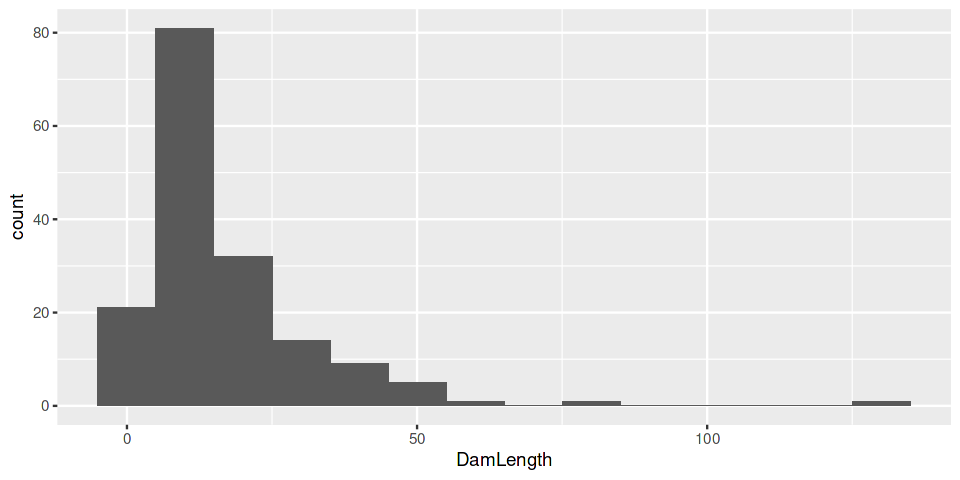

In [52]:
# Mean and Median are pretty different on length - explore dam length distribution next
ggplot(DamData,aes(DamLength)) +
    geom_histogram(binwidth = 10)

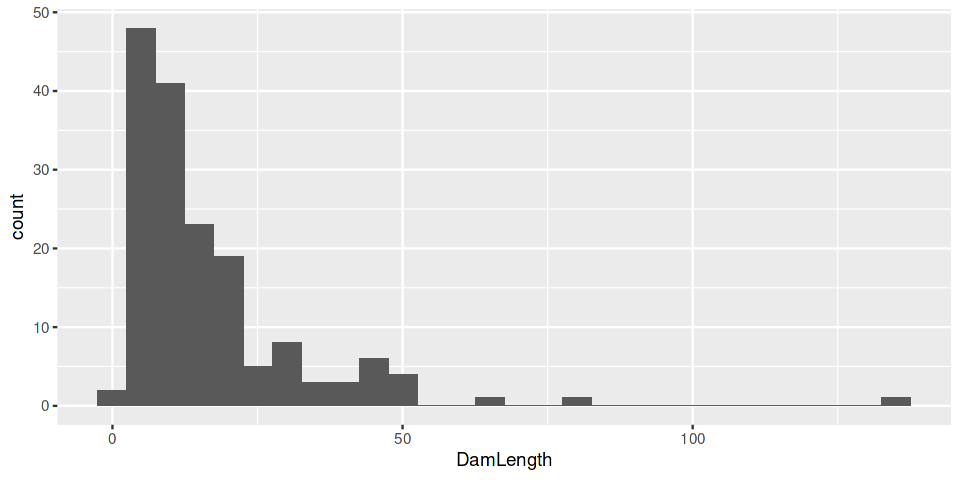

In [53]:
# smaller bin width on dam length
ggplot(DamData,aes(DamLength)) +
    geom_histogram(binwidth = 5)

In [54]:
# dam length data is definitely positive skewed, but there are some interesting outliers
# look at just the big dams for a sec - dams bigger than 50m
BigDams = subset(DamData, DamLength > 50)
head(BigDams)

,DamElevation,DamLength
,<dbl>,<dbl>
161,1728,50.3
162,1727,52.4
163,1728,63.3
164,1708,79.3
165,1708,133.0


In [55]:
# Check how many dams fit that criteria
count(BigDams)

n
<int>
5


In [56]:
# only five, lets show the whole dataset
show(BigDams)

    DamElevation DamLength
161         1728      50.3
162         1727      52.4
163         1728      63.3
164         1708      79.3
165         1708     133.0


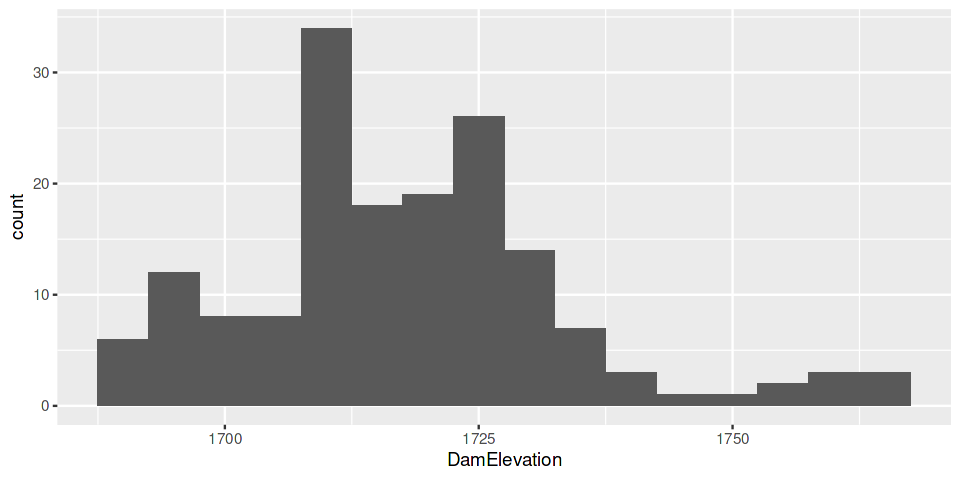

In [57]:
# looks like it is really one huge dam then a handful of big-ish dams, move on to dam elevation next
# check distribution of elevations
ggplot(DamData,aes(DamElevation)) +
    geom_histogram(binwidth = 5)

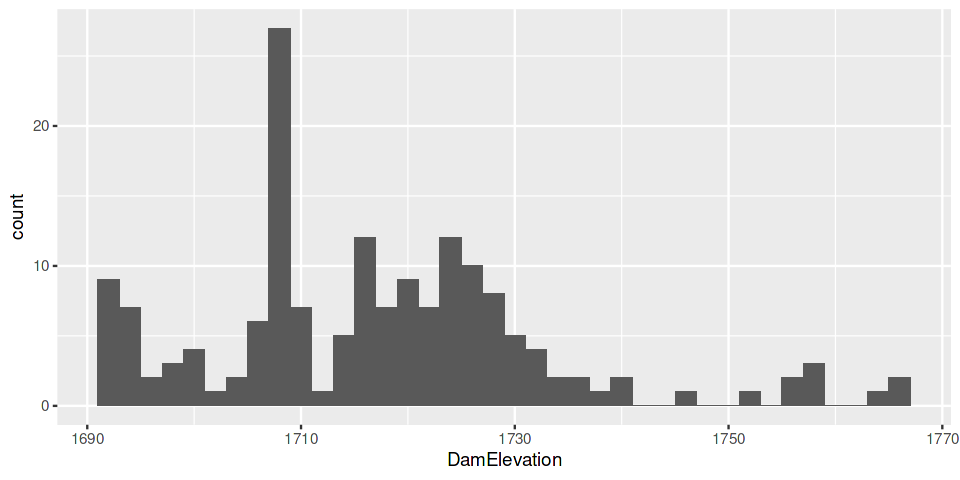

In [58]:
# looks like data has slight positive skew, maybe a small bimodal bump?
# try a finer bin width
ggplot(DamData,aes(DamElevation)) +
    geom_histogram(binwidth = 2)

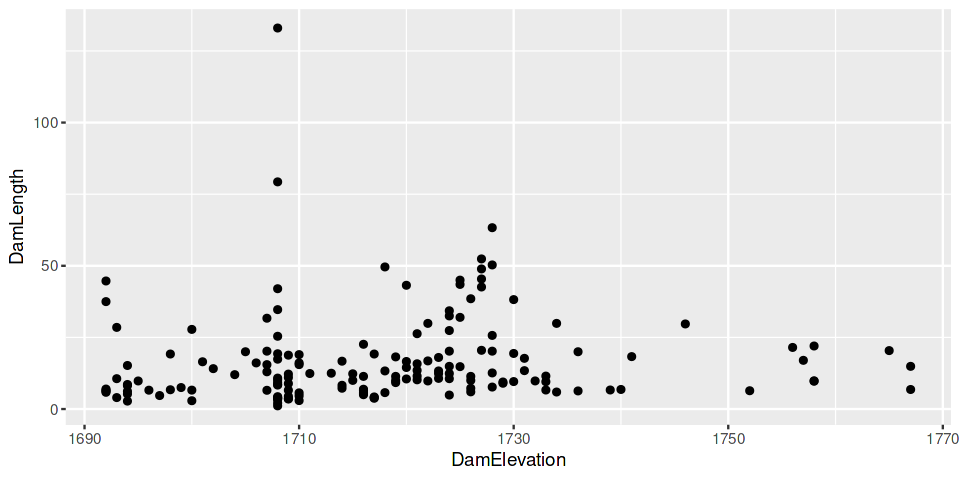

In [59]:
# hmm data looks weird and arc-like 
# kind of like the back of a sea dragon
# not sure what to make of it, doesn't really fit into my story like this, so I'll ignore it for now
# try a bivariate plot - I am only looking at two variables so there is really only one way to make this
ggplot(DamData,aes(DamElevation,DamLength)) +
    geom_point()

In [60]:
#What about making more subsets or making new columns??
#Make Subsets for Big and Small Dams
BigDams = subset(DamData, DamLength >30)
SmallDams = subset(DamData, DamLength<=30)

#Make a New Column Where Dams are Labeled as Big or Small
DamData$Class <- ifelse(DamData$DamLength<=30, "Small Dam", "Large Dam")

In [61]:
# oof this data looks weird - why so many spikes?
# maybe because beavers build clusters of dams, so at a given elevation/point in the landscape, there would be lots of dams
# some big, some small
# need to check literature to make sure this is possible/real
# these feels like a good stopping points for my story though


***
## Step 2: Storytelling 
### Beavers Work Dam Hard 
#### What do beavers do?
Beavers build dams made of sticks, stones, and mud on rivers and creeks. Those creeks slow down the flow of water and [make ponds that fish, insects, birds, and other mammals can all benefit from.](https://www.youtube.com/watch?v=vHeqLYdvdI8) 

Through their construction of dams, beavers actually create and maintain a large amount of wetland habitat throughout the American west - including in dry places like the Domeland Wilderness of [Sequoia National Forest](https://www.fs.usda.gov/recarea/sequoia/recarea/?recid=79565).   




#### The Domeland Wilderness
The Domeland Wilderness is a rocky, dry landscape located up in the Sierra Mountains of California (below). It is home to climbers, hikers, a portion of the [Pacific Crest Trail](https://www.pcta.org/), and of course beavers. The beavers mainly live between 5500ft to 5800ft elevation (*from summary stats min and max values*) - that's about a mile above sea level! Up at this elevation and in this climate, trees and water are both scarce.
![Domeland Wilderness](https://static.wixstatic.com/media/e767ae_2374acda218d4c79a619519ea09e3e29~mv2.jpg/v1/fill/w_640,h_480,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/e767ae_2374acda218d4c79a619519ea09e3e29~mv2.jpg)




#### Overcoming the Odds
Despite the limited resources in the Domeland Wilderness, beavers are as busy as ever building dams. In fact, there are 165 known beaver dams (*from length calculation*) in the Domeland Wilderness! These dams come in all sorts of shapes and sizes, as you can see below in the satellite imagery and histogram.
![Beaver dams satellite image](https://i.imgur.com/45upc6s.jpg)


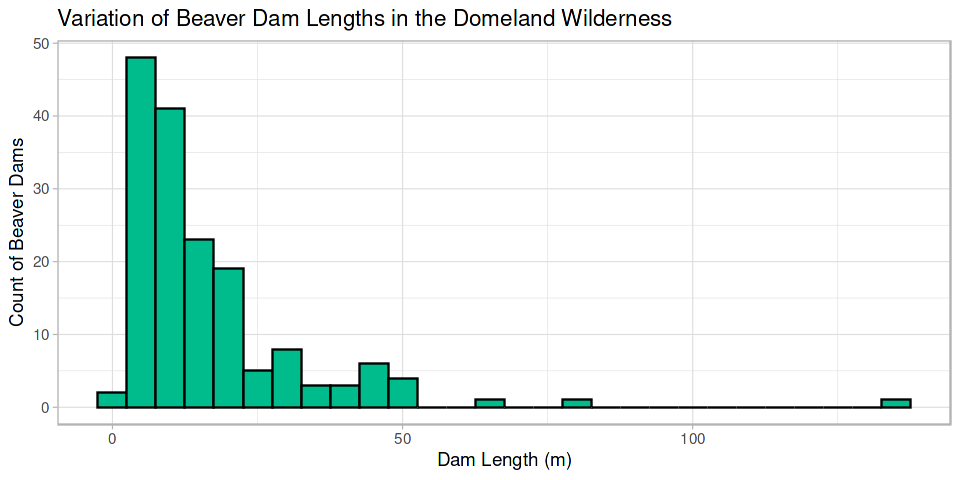

In [62]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(DamData,aes(DamLength)) +
    geom_histogram(binwidth = 5, fill="#00bb8c", color="black") +
    ggtitle("Variation of Beaver Dam Lengths in the Domeland Wilderness") +
    xlab("Dam Length (m)") + 
    ylab("Count of Beaver Dams") +
    theme_light()

Furthermore, the beavers don't care if they are up at high elevation in the headwaters or down lower in the valley bottoms - they build dams at all elevations (*from bivariate elevation vs length plot*). Want proof? Look at the plot below - there is no trend in the data up or down! It doesn't matter if we're at 5800ft high (1767m) or 5500ft high (1697m), there will be beavers!

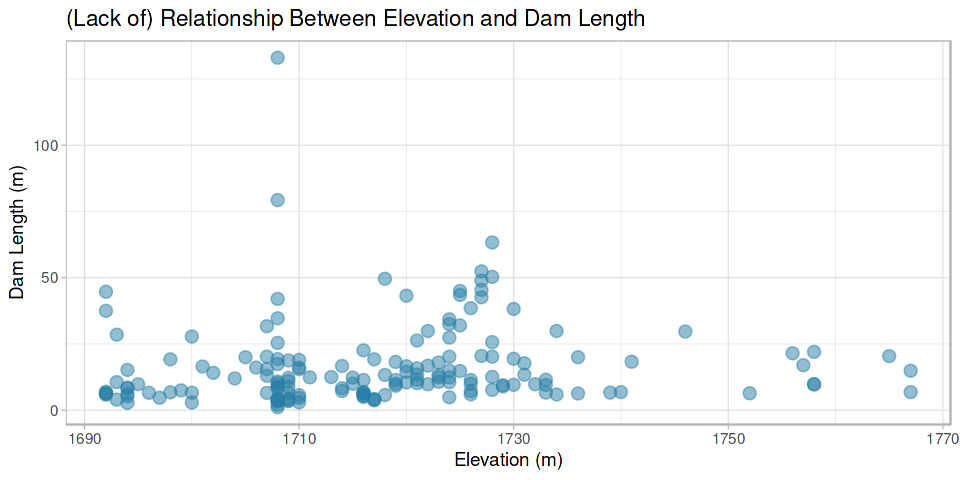

In [63]:
ggplot(DamData,aes(DamElevation,DamLength)) +
    geom_point(alpha=0.5, color="#287ea6", size=3) +
    ggtitle("(Lack of) Relationship Between Elevation and Dam Length") +
    xlab("Elevation (m)") + 
    ylab("Dam Length (m)") +
    theme_light()

In the end, it doesn't matter if its hot and dry, or high elevation, or if trees and water are scarce - beavers are incredibly industrious creatures who can build dams large and small all over the landscape. 

**They truly are [nature's engineers!](https://www.youtube.com/watch?v=IAM94B73bzE)**

***

#### The above example of data analysis, storytelling, and the intertwining of the two would receive full credit.

**For your disaster stories, I need to see:** 
- clear and well documented notebooks (use comments and Markdown as needed to make your work and process abundantly clear to me) 
- logical flow (mixed code and Markdown cells as appropriate
- a demonstration of R skills (successful import of data, successful subset of data, at least two different plot types that have been formatted to be visually appealing, at least two of the big three descriptive stats) 
- a demonstration of your understanding of descriptive statistics (put your stats into context, interpret them - don't just quote numbers in a void)
- your ability to use communicate using your data (write clearly, indicate in your writing where you are referring to something you calculated or made from your data)

# Happy Coding!

# -------------------------------------------------------------------------------------------------------------

# Alright, let's talk tsunamis... 🌊
## But first, a bit of data preparation before we *dive* in 😉

In [64]:
#Import libraries
library(tidyverse)


In [65]:
#Import tsunami data
tsudata <- read.csv("https://raw.githubusercontent.com/emilyfairfax/ESRM203/master/TSUcsv.csv")

#Check that the data imported correctly
print("Look out below, the head of the data has printed out correctly")
head(tsudata)
print("Look out below, the tail of the data has printed out correctly")
tail(tsudata)

[1] "Look out below, the head of the data has printed out correctly"


,Year,Month,Day,Hour,Minute,Second,Country,State,Location,Lat,Lon,RegionCode,MaxWaterHeight,MagIIDA,IntensitySoloviev,WarningStatus,DeathCount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-2000,NA,NA,NA,NA,NA,SYRIA,,SYRIAN COASTS,35.68,35.80,50,NA,NA,6,NA,NA
2,-1610,NA,NA,NA,NA,NA,GREECE,,THERA ISLAND (SANTORINI),36.40,25.40,50,90,NA,6,NA,NA
3,-1365,NA,NA,NA,NA,NA,SYRIA,,SYRIAN COASTS,35.68,35.80,50,NA,NA,6,NA,NA
4,-1300,NA,NA,NA,NA,NA,TURKEY,,"IONIAN COASTS, TROAD",39.96,26.24,50,NA,NA,5,NA,NA
5,-760,NA,NA,NA,NA,NA,ISRAEL,,ISRAEL AND LEBANON COASTS,NA,NA,50,NA,NA,3,NA,NA
6,-590,NA,NA,NA,NA,NA,LEBANON,,LEBANON COASTS,33.27,35.22,50,NA,NA,6,NA,NA


[1] "Look out below, the tail of the data has printed out correctly"


,Year,Month,Day,Hour,Minute,Second,Country,State,Location,Lat,Lon,RegionCode,MaxWaterHeight,MagIIDA,IntensitySoloviev,WarningStatus,DeathCount
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2649,2018,12,11,4,48,NA,RUSSIA,,"BUREYA, FAR EASTERN RUSSIA",50.56,131.47,86,90.00,NA,NA,NA,NA
2650,2018,12,22,13,55,NA,INDONESIA,,KRAKATAU,-6.10,105.42,60,30.00,NA,NA,NA,437
2651,2019,5,14,12,58,26,PAPUA NEW GUINEA,,"RABAUL, NEW BRITAIN",-4.08,152.57,82,NA,NA,NA,NA,NA
2652,2019,6,14,0,19,12,CHILE,,CENTRAL CHILE,-30.06,-72.08,89,0.07,NA,NA,NA,NA
2653,2019,6,15,22,55,2,NEW ZEALAND,,"S OF RAOUL ISLAND, KERMADEC ISLANDS",-30.81,-178.10,81,0.14,NA,NA,NA,NA
2654,2019,6,18,13,22,19,JAPAN,,NIIGATA,38.65,139.47,85,0.10,NA,NA,NA,NA


# Exploratory Data Analysis 📊

In [81]:
#Some basic stats on Year and DeathCount

print("Below are some summary statistics for the dataset. ")
summary(tsudata)

print("Below is how many tsunami occurrences are represented in this dataset.")
nrow(tsudata)

print("Below is how many different years are represented in this dataset.")
length(unique(tsudata$Year))

[1] "Below are some summary statistics for the dataset. "


      Year           Month             Day             Hour      
 Min.   :-2000   Min.   : 1.000   Min.   : 1.00   Min.   : 0.00  
 1st Qu.: 1821   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 5.00  
 Median : 1897   Median : 7.000   Median :16.00   Median :11.00  
 Mean   : 1810   Mean   : 6.631   Mean   :15.63   Mean   :11.33  
 3rd Qu.: 1960   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:17.50  
 Max.   : 2019   Max.   :12.000   Max.   :31.00   Max.   :23.00  
                 NA's   :144      NA's   :250     NA's   :1291   
     Minute          Second        Country             State          
 Min.   : 0.00   Min.   : 0.00   Length:2654        Length:2654       
 1st Qu.:14.00   1st Qu.:11.75   Class :character   Class :character  
 Median :30.00   Median :26.00   Mode  :character   Mode  :character  
 Mean   :28.48   Mean   :27.09                                        
 3rd Qu.:43.00   3rd Qu.:43.00                                        
 Max.   :59.00   Max.   :60.00                

[1] "Below is how many tsunami occurrences are represented in this dataset."


[1] 2654

[1] "Below is how many different years are represented in this dataset."


[1] 561

### Whoa! That's a ton of variables 😱 Let's narrow this one down to just a few.

In [67]:
#Determine summary statistics for the average time of occurrence of a tsunami (down to the second!)
print("Summary statistics for Month of landfall")
summary(tsudata$Month[!is.na(tsudata$Month)])
print("Summary statistics for Day of landfall")
summary(tsudata$Day[!is.na(tsudata$Day)])
print("Summary statistics for Hour of landfall")
summary(tsudata$Hour[!is.na(tsudata$Hour)])
print("Summary statistics for Minute of landfall")
summary(tsudata$Minute[!is.na(tsudata$Minute)])
print("Summary statistics for Second of landfall")
summary(tsudata$Second[!is.na(tsudata$Second)])

[1] "Summary statistics for Month of landfall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   7.000   6.631  10.000  12.000 

[1] "Summary statistics for Day of landfall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   16.00   15.63   23.00   31.00 

[1] "Summary statistics for Hour of landfall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.00   11.00   11.33   17.50   23.00 

[1] "Summary statistics for Minute of landfall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   14.00   30.00   28.48   43.00   59.00 

[1] "Summary statistics for Second of landfall"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   11.75   26.00   27.09   43.00   60.00 

### For good measure, let's define a **mode() function** we can use to compute the mode since R doesn't have one built in 🖥


In [83]:
#Define the mode function (via https://www.tutorialspoint.com/r/r_mean_median_mode.htm)
mode <- function(x) {
  x <- x[!is.na(x)]  # Exclude NA values
  if (length(x) == 0) return(NA)  # Return NA if all values are NA
  mode <- names(sort(table(x), decreasing = TRUE))[1]
  as.numeric(mode)  # Convert mode to numeric
}

### Of the **2654** tsunamis that were observed in the dataset, what is the distribution across the months that they occurred? 🤔

Warning message:
“Removed 144 rows containing non-finite values (`stat_bin()`).”


[1] 8

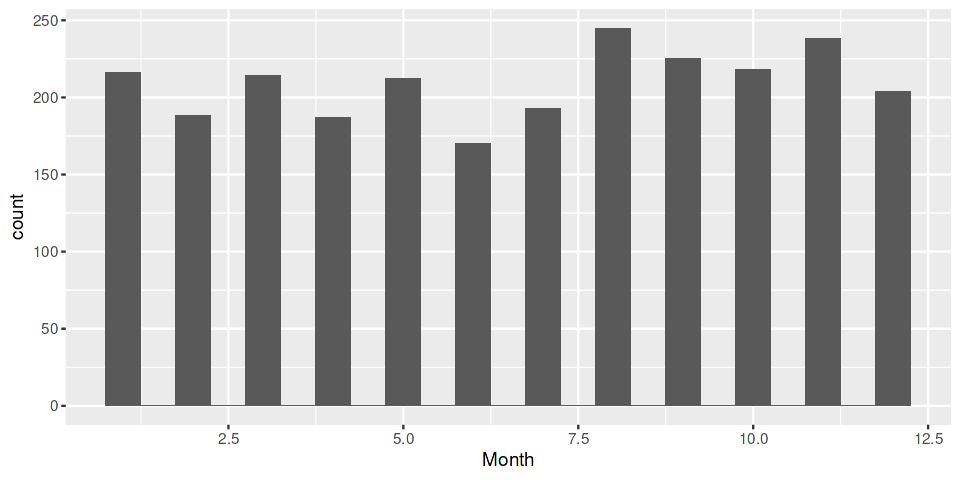

In [84]:
ggplot(tsudata,aes(Month)) +
    geom_histogram(binwidth = 0.5)

mode(tsudata$Month)

### What about days of the month? 🗓

Warning message:
“Removed 250 rows containing non-finite values (`stat_bin()`).”


[1] 9

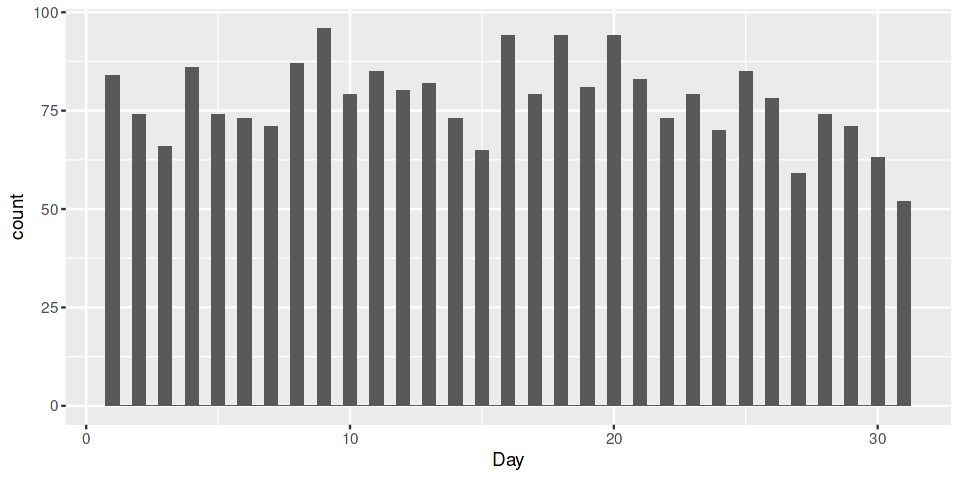

In [85]:
ggplot(tsudata,aes(Day)) +
    geom_histogram(binwidth = 0.5)

mode(tsudata$Day)

### Hours of the day? ⏰

Warning message:
“Removed 1291 rows containing non-finite values (`stat_bin()`).”


[1] 2

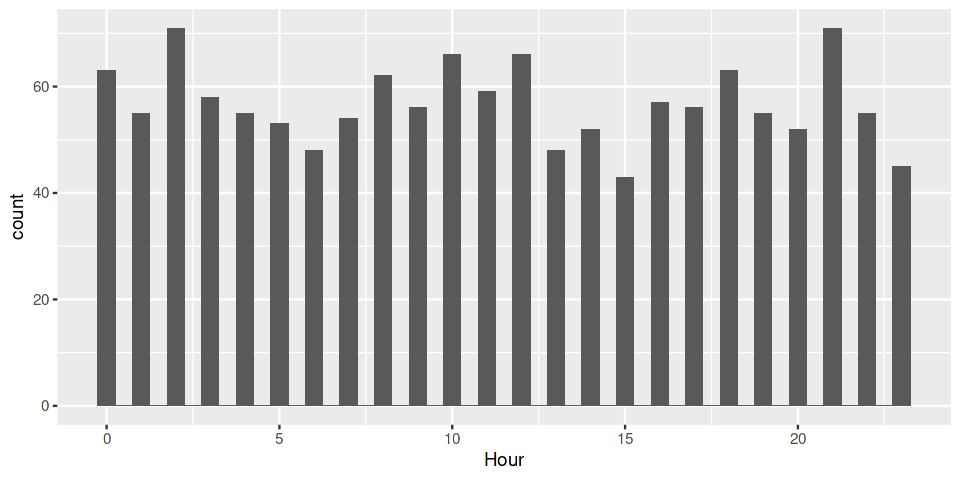

In [87]:
ggplot(tsudata,aes(Hour)) +
    geom_histogram(binwidth = 0.5)

mode(tsudata$Hour)

### Minutes of the hour? 🕒

Warning message:
“Removed 1376 rows containing non-finite values (`stat_bin()`).”


[1] 30

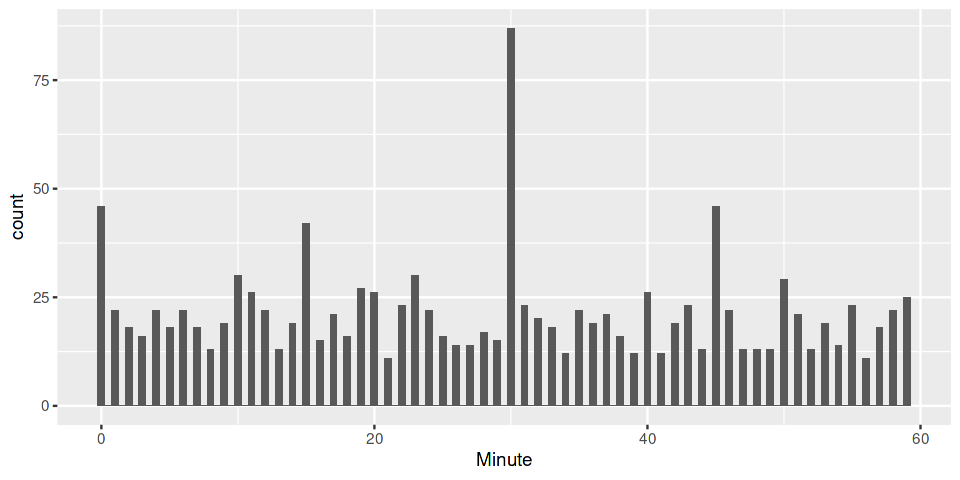

In [88]:
ggplot(tsudata,aes(Minute)) +
    geom_histogram(binwidth = 0.5)

mode(tsudata$Minute)

### How about seconds of the minute? ⏱

Warning message:
“Removed 1774 rows containing non-finite values (`stat_bin()`).”


[1] 0

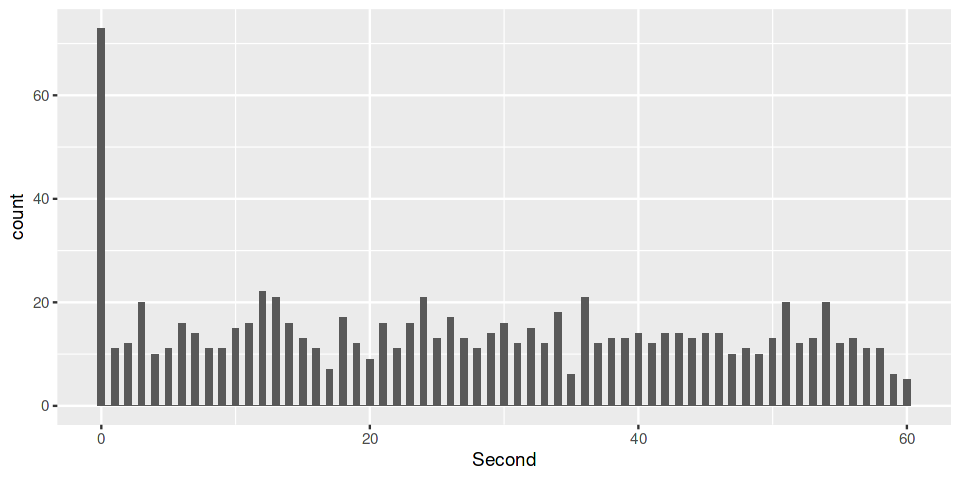

In [89]:
ggplot(tsudata, aes(Second)) +
    geom_histogram(binwidth = 0.5)

mode(tsudata$Second)

# Storytime 📖

### "Tsunamis are just tidal waves, so just avoid the 100ft tall wave and you're just fine, right?" **Wrong**.

#### First of all, the word “tsunami” has been internationally adopted to mean waves caused by any *large* and *sudden* **_displacement_** of the ocean. Tsunamis are not related to [tides](https://oceanservice.noaa.gov/facts/tides.html#:~:text=Tides%20are%20very%20long%2Dperiod,fall%20of%20the%20sea%20surface.https://oceanservice.noaa.gov/facts/tides.html#:~:text=Tides%20are%20very%20long%2Dperiod,fall%20of%20the%20sea%20surface.), which result from the gravitational attraction of the Sun and Moon on Earth’s oceans. 

#### Secondly, tsunamis are [**_unpredictable_**](https://www.noaa.gov/jetstream/tsunamis/detection-warning-and-forecasting#:~:text=Like%20the%20earthquakes%20that%20generate,the%20next%20tsunami%20will%20strike.). Because they do not always occur because of a seismic disturbance (fancy term for earthquake), they cannot always be reliably predicted using traditional seismic forecasting methods.
#### Instead, tsunami warning centers **_[use tsunami forecast models to forecast wave height and arrival times, location and amount of flooding, and how long the tsunami will last](https://www.tsunami.gov/?page=tsunamiFAQ)_**.

![Tsunami Image](https://www.bosai.go.jp/e/sp/research/project/img/19_2.png)
> Pretty complicated, huh? *(image per the Japanese National Research Institute for Earth Science and Disaster Resilience)*

#### Although, because of this complexity, understanding when a tsunami is most likely to occur is a **challenge**. A strong piece of information for those who don't have access to these resources could be to have an idea what the **_average time_** of a tsunami occurrence is.


In [73]:
#Calculate the time of occurrence for each row in seconds
tsudata$Time <- tsudata$Month*30*24*60*60 + tsudata$Day*24*60*60 + tsudata$Hour*60*60 + tsudata$Minute*60 + tsudata$Second

#Calculate the overall average time of occurrence
overall_avg_time <- mean(tsudata$Time, na.rm = TRUE)

#Convert the overall average time back to Month, Day, Hour, Minute, and Second for display
avg_month <- floor(overall_avg_time / (30*24*60*60)) # floor() rounds down to the nearest integer
avg_day <- floor((overall_avg_time %% (30*24*60*60)) / (24*60*60))
avg_hour <- floor((overall_avg_time %% (24*60*60)) / (60*60))
avg_minute <- floor((overall_avg_time %% (60*60)) / 60)
avg_second <- floor(overall_avg_time %% 60)

#Display the result
cat("Average Time of Occurrence of Tsunamis:",
    "Month:", avg_month,
    "Day:", avg_day,
    "Hour:", avg_hour,
    "Minute:", avg_minute,
    "Second:", avg_second, "\n")


Average Time of Occurrence of Tsunamis: Month: 7 Day: 5 Hour: 15 Minute: 26 Second: 37 


# Therefore, everyone should evacuate every year on **_July 5th, at 3:36:37 PM_**, right?

#### Not quite, because of the large variety of factors that contribute to tsunami timing, its best to make **subsets** to observe when tsunamis occur in their <ins>respective regions</ins>.

#### By getting an understanding of tsunami occurrence at this more specific scale (*like location*), more effective measures can be put into place in order to prepare for an appropriate evacuation effort.

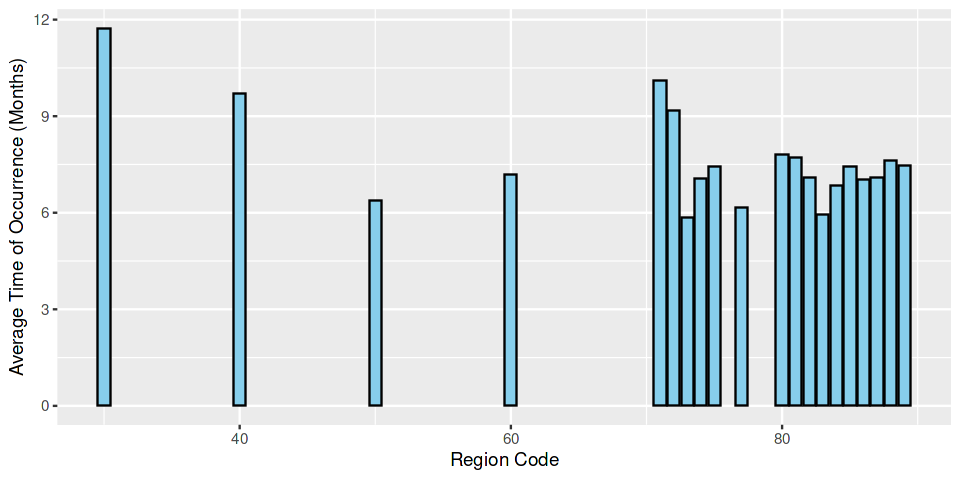

In [74]:
#Calculate the time of occurrence for each row in months
tsudata$Time_in_months <- tsudata$Month + tsudata$Day/30 + tsudata$Hour/(30*24) + tsudata$Minute/(30*24*60) + tsudata$Second/(30*24*60*60)

#Calculate the average time of occurrence for each region
avg_time <- aggregate(Time_in_months ~ RegionCode, data = tsudata, FUN = mean) #aggregate() creates a new dataframe that I can then plot from

#Plotting using col geom
ggplot(avg_time, aes(x = RegionCode, y = Time_in_months)) +
  geom_col(fill = "skyblue", color = "black") +
  labs(x = "Region Code", y = "Average Time of Occurrence (Months)")

# **_For the analyis' sake_**, I'll omit the first region code and consider the data in two "bins": region codes 40-60 and region codes 70-90. 

- With these subsets, I'll then determine the average time in each of these regional bins and **compare** them to each other in order to determine that the time of tsunami occurrence *varies* from region to region. 🌎

In [90]:
#Subset the dataset for region codes 40-60
subset_40_60 <- subset(tsudata, RegionCode >= 40 & RegionCode <= 60)

#Subset the dataset for region codes 70-90
subset_70_90 <- subset(tsudata, RegionCode >= 70 & RegionCode <= 90)

#Function to convert time in seconds to months, days, hours, minutes, and seconds
convert_time <- function(time_in_seconds) {
  avg_month <- floor(time_in_seconds / (30*24*60*60)) #using floor() again to round down the values
  avg_day <- floor((time_in_seconds %% (30*24*60*60)) / (24*60*60))
  avg_hour <- floor((time_in_seconds %% (24*60*60)) / (60*60))
  avg_minute <- floor((time_in_seconds %% (60*60)) / 60)
  avg_second <- floor(time_in_seconds %% 60)
  return(c(avg_month, avg_day, avg_hour, avg_minute, avg_second))
}

#Calculate the average time for region codes [40-60] and convert to months, days, hours, minutes, and seconds
avg_time_40_60 <- mean(subset_40_60$Time, na.rm = TRUE)
converted_avg_time_40_60 <- convert_time(avg_time_40_60)

#Calculate the average time for region codes [70-90] and convert to months, days, hours, minutes, and seconds
avg_time_70_90 <- mean(subset_70_90$Time, na.rm = TRUE)
converted_avg_time_70_90 <- convert_time(avg_time_70_90)

#Print the results
cat("Average Time of Occurrence for region codes [40-60]:\n",
    "Average Month:", converted_avg_time_40_60[1], "\n",
    "Average Day:", converted_avg_time_40_60[2], "\n",
    "Average Hour:", converted_avg_time_40_60[3], "\n",
    "Average Minute:", converted_avg_time_40_60[4], "\n",
    "Average Second:", converted_avg_time_40_60[5], "\n\n")

cat("Average Time of Occurrence for region codes [70-90]:\n",
    "Average Month:", converted_avg_time_70_90[1], "\n",
    "Average Day:", converted_avg_time_70_90[2], "\n",
    "Average Hour:", converted_avg_time_70_90[3], "\n",
    "Average Minute:", converted_avg_time_70_90[4], "\n",
    "Average Second:", converted_avg_time_70_90[5], "\n")

Average Time of Occurrence for region codes [40-60]:
 Average Month: 6 
 Average Day: 27 
 Average Hour: 13 
 Average Minute: 48 
 Average Second: 49 

Average Time of Occurrence for region codes [70-90]:
 Average Month: 7 
 Average Day: 6 
 Average Hour: 21 
 Average Minute: 16 
 Average Second: 22 


# Eureka! Our **average tsunami times** have been determined for the dataset given the predetermined **region code bins**. 😄
### But what's so good about this approach??
- You can make the bins even **<sub>smaller</sub>** which will increase the accuracy of the estimates from region to region. 🗺
- Based on your region code, you can now determine what the most common time of the year that a tsunami is likely to occur nearest you.

**All in all**, the information we get from this analysis aids a prompt evacuation effort, supporting a proactive and swift response to an often deadly (*and inevitable*) natural disaster.